## Statistical Analysis of UN Threatened SPecies Dataset
By Raj Saluja (10/22/19)

## Abstract

* Analyzing a dataset containing the number of threatend species in certain regions of different countries in multiple years
* Two questions I hope to answer
    1. What does simple linear regression modeling of this data show about possible future threatened species?
    2. What are the maximum, minimum, and average number of threatened species in America and how do these compare to the data from the entire world?

## Dataset Preparation
* Dataset was last updated on May 15, 2019
* It contains seven pieces of data about 6,194 rows (Region, country, year, series, value, footnotes, and source)
* I will be focusing on country and value
* The dataset was found on http://data.un.org/

In [2]:
import pandas as pd
import statistics
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

my_df = pd.read_csv('SYB62_T25_201905_Threatened Species_modified1.csv')

Here I am importing pandas and having it read my dataset. I make a variable for this pandas reading called my_df. All of the file contents are put in a data structure called a DataFrame. This makes it so that I can use my dataset moving forward.

I also imported statistics (for stats), numPy, sciPy, matplotlip.pyplot (for graphics), and seaborn (for graphics). 

In [3]:
my_df.head(3)

,Region,Country,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,2004,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
1,4,Afghanistan,2010,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
2,4,Afghanistan,2015,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."


Here I printed the first three lines of the dataset to make sure that it was working properly, and it was. There were two lines of headers in the original dataset so I needed to go into the excel spreadsheet and manually change it. In the future I would like to learn some code to keep the first line of headers and tell the computer that there are two lines.

In [4]:
type(my_df)

pandas.core.frame.DataFrame

Here I checked the type of variable I had made to make sure that it was a DataFrame like I wanted. It was  a DataFram so I was  good to move on.

In [5]:
my_df.index

RangeIndex(start=0, stop=6914, step=1)

Here I checked to see how many rows were in my dataset to make sure I had the whole thing. It was 6,914 just like I wanted so it was the entire dataset.

In [6]:
my_df["Value"] = my_df["Value"].str.replace(",","").astype(int)
my_df[388:392]

,Region,Country,Year,Series,Value,Footnotes,Source
388,36,Australia,2017,Threatened Species: Total (number),948,Excluding overseas territories.,"World Conservation Union (IUCN), Gland and Cam..."
389,36,Australia,2018,Threatened Species: Total (number),998,Excluding overseas territories.,"World Conservation Union (IUCN), Gland and Cam..."
390,36,Australia,2019,Threatened Species: Total (number),1010,Excluding overseas territories.,"World Conservation Union (IUCN), Gland and Cam..."
391,40,Austria,2004,Threatened Species: Vertebrates (number),20,NaN,"World Conservation Union (IUCN), Gland and Cam..."


Later in my code, I had problems making a linear regression graph because there were commas in some of the numbers. The first line of code deleted these commas so I wouldn't have a problem anymore. I printed the part of the dataset where there was a comma in order to make sure it was deleted and it was be because line 390 was 1010 instead of 1,010.

## Data Modeling

In [7]:
X = my_df.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = my_df.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

Here I set up my linear regression graph. On the first I converted the year column of my dataset into a numpy array. Then I did the same thing with the value column of my dataset. Next I created an object for the class. After that I performed the linear regression and made predictions.

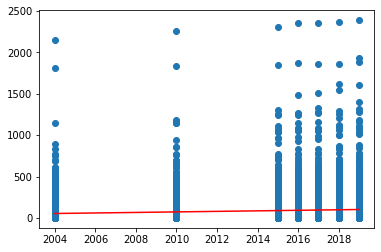

In [8]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Here I made my linear regression graph. I made the regression line, which is based on the average number of threatened species per year, red. This answered my first question about linear regression.

In [20]:
USA = gk.get_group('United States of America') 
USA

,Region,Year,Series,Value,Footnotes,Source
6578,840,2004,Threatened Species: Vertebrates (number),342,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6579,840,2010,Threatened Species: Vertebrates (number),376,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6580,840,2015,Threatened Species: Vertebrates (number),444,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6581,840,2016,Threatened Species: Vertebrates (number),454,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6582,840,2017,Threatened Species: Vertebrates (number),456,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6583,840,2018,Threatened Species: Vertebrates (number),462,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6584,840,2019,Threatened Species: Vertebrates (number),475,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6585,840,2004,Threatened Species: Invertebrates (number),561,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6586,840,2010,Threatened Species: Invertebrates (number),531,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6587,840,2015,Threatened Species: Invertebrates (number),575,NaN,"World Conservation Union (IUCN), Gland and Cam..."


Here I created a variable in which I put only data from the U.S. I then printed this data to make sure it worked.

In [18]:
USA.describe()

,Region,Year,Value
count,28.0,28.000000,28.000000
mean,840.0,2014.142857,694.714286
std,0.0,5.031120,428.743285
min,840.0,2004.000000,240.000000
25%,840.0,2010.000000,452.250000
50%,840.0,2016.000000,538.000000
75%,840.0,2018.000000,720.750000
max,840.0,2019.000000,1600.000000


Here I described the U.S. data in order to find the maximum, minimum, and average number of threatened species. The maximum is 1,600, the minimum is 240, and the average is 694.7.

In [19]:
my_df.describe()

,Region,Year,Value
count,6914.000000,6914.000000,6914.000000
mean,434.844663,2014.213335,86.158953
std,254.089734,4.890946,177.616701
min,4.000000,2004.000000,0.000000
25%,214.000000,2010.000000,9.000000
50%,434.000000,2016.000000,34.000000
75%,654.000000,2018.000000,85.000000
max,896.000000,2019.000000,2388.000000


Here I described the overall dataset in order to find the maximum, minimum, and average number of threatened species so I could compare it to the U.S. data. The maximum is 2,388, the minimum is 0, and the average is 86.2.

## Data Analysis and Conclusions

When I started this lab I expected the total number of threatened species to be going up, but at a relativley fast rate. This turned out to be wrong based on my linear regression graph. The graph shows that the number of threatened species is going up, but at a very slow rate. I have always heard that the number of threatened species is very bad, so I naturally assumed that it was getting much worse. Now that I realise that's wrong, there is one explanation: the number of threatened specices has always been high but we haven't done anything about it, resulting in a number of people saying it'incredibly high. The fact that the number of threatened species is going up makes me think of two questions: what can we do to stop it and what have we already tried? These are both areas for future exploration. Moving forward, this linear regression graph tells me that in the future the number of threatened species will slowly go up like it has in the past unless something happens to stop it.

When I started this lab I expected the U.S. to not have nearly as many threatened species as the rest of the world because we don't have as many species in general, and even the species that we do have aren't often talked about when it comes to threatened species. This turned out to be wrong. Though the U.S. had a much lower maximum number of threatened species than the rest of the world (1,600 compared to 2,388) it had a much higher minimum and average. The U.S. had a minimum of 28 compared to the rest of the world with 0 and an average of 694.7 compared to the rest of the world which had 86.2. The maximum and minimum for the rest of the wors was predictably much more extreme than the U.S. because it was every other country and one of them was bound to have a rediculously high or low number of threatened specied in any given year. The surprising thing was the average, as the U.S. had an average of 608.5 more threatened species. This makes me wonder how this is the case given the fact that the U.S. has less species and our species are less talked about in terms of being threatened than many other countries. My best guess is that the average for the rest of the world is being brought down by a lot of small countries with insanley small numbers of threatened species. This is an area for future exploration.

Overall, there were some surprises and some expected aspects to my results. I was able to reason through some of the surprises but there is definitely more to explore in the future.

## Acknowledgements

I would like to thank Ms. Sconyers, this wesbite: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/, and this website: https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d. All three helped me with my code.